# ResNet

- **Training set**: LO_SARD102
- **Test/Validation set:** LO_SARD102
- **Features**: bert (128)

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import applications
from tensorflow.keras.utils import to_categorical
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from helper_functions import *
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.metrics import classification_report

X = numpy.load('/mnt/md0/user/scheuererra68323/LOSARD102_bert128_X.npy')
y = pd.read_hdf('/mnt/md0/user/scheuererra68323/LOSARD102_bert128_y.h5').is_vulnerable.values

X_train, X_test, Y_train, Y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=5)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, stratify=Y_train, test_size=0.25, random_state=10)

print("class counts data set before undersampling:", Counter(Y_train))
# undersample class 0
X_train, Y_train = undersample( np.reshape(X_train, (-1, 128*768) ), Y_train)
X_train = np.reshape(X_train, (-1, 128, 768))

print("Y_train:")
print(Counter(Y_train))
print(X_train.shape)
print(Y_train.shape)
print("\nY_val:")
print(Counter(Y_val))
print(X_val.shape)
print(Y_val.shape)
print("\nY_test:")
print(Counter(Y_test))
print(X_test.shape)
print(Y_test.shape)

Y_train, Y_val = to_categorical(Y_train), to_categorical(Y_val)

class counts data set before undersampling: Counter({0: 30438, 1: 274})
Y_train:
Counter({0: 274, 1: 274})
(548, 128, 768)
(548,)

Y_val:
Counter({0: 10146, 1: 92})
(10238, 128, 768)
(10238,)

Y_test:
Counter({0: 10146, 1: 92})
(10238, 128, 768)
(10238,)


## Undersampling

In [20]:
# https://keras.io/api/applications/resnet/#resnet50-function
model = applications.ResNet50(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=(128, 768, 1),
    pooling=None,
    classes=2
)

sgd = tf.keras.optimizers.SGD(learning_rate=0.1)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

history = model.fit(X_train, Y_train,
                    epochs=8,
                    verbose=True,
                    validation_data=(X_val, Y_val)
                   )

Epoch 1/8
18/18 [==============================] - 28s 2s/step - loss: 8.7287 - accuracy: 0.5383 - val_loss: 57247.2695 - val_accuracy: 0.0090
Epoch 2/8
18/18 [==============================] - 25s 1s/step - loss: 1.8666 - accuracy: 0.5876 - val_loss: 198.1790 - val_accuracy: 0.0090
Epoch 3/8
18/18 [==============================] - 25s 1s/step - loss: 0.4029 - accuracy: 0.8814 - val_loss: 9.1841 - val_accuracy: 0.0090
Epoch 4/8
18/18 [==============================] - 25s 1s/step - loss: 0.1907 - accuracy: 0.9343 - val_loss: 11.4240 - val_accuracy: 0.0090
Epoch 5/8
18/18 [==============================] - 25s 1s/step - loss: 0.2807 - accuracy: 0.8741 - val_loss: 45.6634 - val_accuracy: 0.0090
Epoch 6/8
18/18 [==============================] - 25s 1s/step - loss: 0.2632 - accuracy: 0.9325 - val_loss: 0.0954 - val_accuracy: 0.9910
Epoch 7/8
18/18 [==============================] - 26s 1s/step - loss: 0.1146 - accuracy: 0.9726 - val_loss: 0.1661 - val_accuracy: 0.9910
Epoch 8/8
18/18 [==

## Evaluation

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     10146
           1       0.00      0.00      0.00        92

    accuracy                           0.99     10238
   macro avg       0.50      0.50      0.50     10238
weighted avg       0.98      0.99      0.99     10238

Confusion matrix:
[[10146     0]
 [   92     0]]

Confusion matrix (Percentages):
[[99.101  0.   ]
 [ 0.899  0.   ]]

Metrics:
Sensitivity (TPR): 0.000000
Specifity (TNR):   1.000000

FPR: 0.000000
FNR: 1.000000

Balanced accuracy: 0.500000



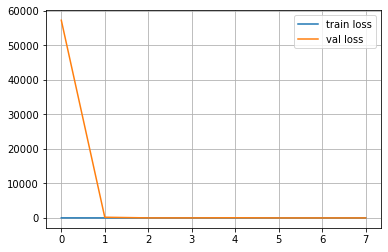

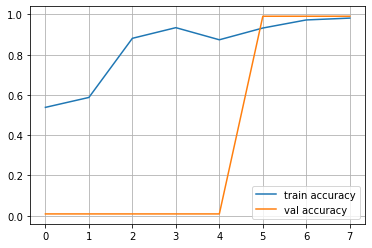

In [21]:
Y_pred = numpy.argmax(model.predict(X_test) , axis=1 )

print(classification_report(Y_test, Y_pred))
print_metrics(confusion_matrix(Y_test, Y_pred), Y_test)
print()

plot_loss(history)
plot_accuracy(history)

In [22]:
model.save('ResNet_bert128_undersample.h5')

## weighted

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=5)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, stratify=Y_train, test_size=0.25, random_state=10)

classWeights = {
    0: ( 1 / Counter(Y_train)[0] ) * Y_train.shape[0] / 2.0 ,
    1: ( 1 / Counter(Y_train)[1] ) * Y_train.shape[0] / 2.0
}
print("weights:", classWeights)

print("train:")
print(Counter(Y_train))
print(X_train.shape)
print(Y_train.shape)
print("\nval:")
print(Counter(Y_val))
print(X_val.shape)
print(Y_val.shape)
print("\ntest:")
print(Counter(Y_test))
print(X_test.shape)
print(Y_test.shape)

Y_train, Y_val = to_categorical(Y_train), to_categorical(Y_val)

weights: {0: 0.5045009527564229, 1: 56.043795620437955}
train:
Counter({0: 30438, 1: 274})
(30712, 128, 768)
(30712,)

val:
Counter({0: 10146, 1: 92})
(10238, 128, 768)
(10238,)

test:
Counter({0: 10146, 1: 92})
(10238, 128, 768)
(10238,)


In [7]:
# https://keras.io/api/applications/resnet/#resnet50-function
model = applications.ResNet50(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=(128, 768, 1),
    pooling=None,
    classes=2
)

sgd = tf.keras.optimizers.SGD(learning_rate=0.1)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

history = model.fit(X_train, Y_train,
                    epochs=8,
                    verbose=True,
                    validation_data=(X_val, Y_val),
                    class_weight=classWeights
                   )

Epoch 1/8
960/960 [==============================] - 244s 254ms/step - loss: 1.3364 - accuracy: 0.7727 - val_loss: 0.0278 - val_accuracy: 0.9910
Epoch 2/8
960/960 [==============================] - 244s 254ms/step - loss: 0.2100 - accuracy: 0.9322 - val_loss: 9.4316 - val_accuracy: 0.4882
Epoch 3/8
960/960 [==============================] - 243s 253ms/step - loss: 0.1985 - accuracy: 0.9334 - val_loss: 0.0664 - val_accuracy: 0.9867
Epoch 4/8
960/960 [==============================] - 242s 252ms/step - loss: 0.1380 - accuracy: 0.9577 - val_loss: 1673.2665 - val_accuracy: 0.0090
Epoch 5/8
960/960 [==============================] - 241s 251ms/step - loss: 0.4167 - accuracy: 0.9368 - val_loss: 0.0861 - val_accuracy: 0.9921
Epoch 6/8
960/960 [==============================] - 241s 251ms/step - loss: 0.1700 - accuracy: 0.9509 - val_loss: 0.0401 - val_accuracy: 0.9910
Epoch 7/8
960/960 [==============================] - 240s 250ms/step - loss: 0.1197 - accuracy: 0.9655 - val_loss: 0.0894 - val

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     10146
           1       0.38      0.98      0.54        92

    accuracy                           0.99     10238
   macro avg       0.69      0.98      0.77     10238
weighted avg       0.99      0.99      0.99     10238

Confusion matrix:
[[9996  150]
 [   2   90]]

Confusion matrix (Percentages):
[[9.7636e+01 1.4650e+00]
 [2.0000e-02 8.7900e-01]]

Metrics:
Sensitivity (TPR): 0.978261
Specifity (TNR):   0.985216

FPR: 0.014784
FNR: 0.021739

Balanced accuracy: 0.981738



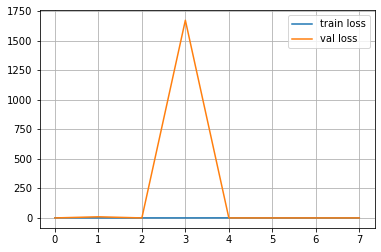

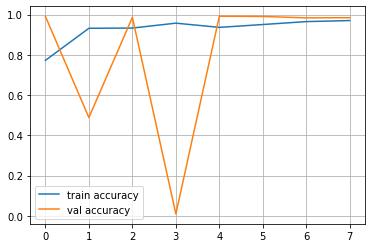

In [8]:
Y_pred = numpy.argmax(model.predict(X_test) , axis=1 )

print(classification_report(Y_test, Y_pred))
print_metrics(confusion_matrix(Y_test, Y_pred), Y_test)
print()

plot_loss(history)
plot_accuracy(history)

In [9]:
model.save('ResNet_bert128_weighted.h5')

## No imbalance migation

In [10]:
# https://keras.io/api/applications/resnet/#resnet50-function
model = applications.ResNet50(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=(128, 768, 1),
    pooling=None,
    classes=2
)

sgd = tf.keras.optimizers.SGD(learning_rate=0.1)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

history = model.fit(X_train, Y_train,
                    epochs=8,
                    verbose=True,
                    validation_data=(X_val, Y_val)
                   )

Epoch 1/8
960/960 [==============================] - 242s 252ms/step - loss: 0.1234 - accuracy: 0.9941 - val_loss: 0.0296 - val_accuracy: 0.9932
Epoch 2/8
960/960 [==============================] - 241s 251ms/step - loss: 0.0054 - accuracy: 0.9985 - val_loss: 0.0254 - val_accuracy: 0.9989
Epoch 3/8
960/960 [==============================] - 240s 250ms/step - loss: 0.0033 - accuracy: 0.9989 - val_loss: 0.0034 - val_accuracy: 0.9990
Epoch 4/8
960/960 [==============================] - 239s 249ms/step - loss: 0.0028 - accuracy: 0.9987 - val_loss: 0.0326 - val_accuracy: 0.9981
Epoch 5/8
960/960 [==============================] - 239s 248ms/step - loss: 0.0022 - accuracy: 0.9989 - val_loss: 0.0226 - val_accuracy: 0.9981
Epoch 6/8
960/960 [==============================] - 239s 249ms/step - loss: 0.0023 - accuracy: 0.9989 - val_loss: 0.0048 - val_accuracy: 0.9981
Epoch 7/8
960/960 [==============================] - 238s 248ms/step - loss: 0.0023 - accuracy: 0.9992 - val_loss: 0.0032 - val_ac

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10146
           1       0.92      0.97      0.94        92

    accuracy                           1.00     10238
   macro avg       0.96      0.98      0.97     10238
weighted avg       1.00      1.00      1.00     10238

Confusion matrix:
[[10138     8]
 [    3    89]]

Confusion matrix (Percentages):
[[9.9023e+01 7.8000e-02]
 [2.9000e-02 8.6900e-01]]

Metrics:
Sensitivity (TPR): 0.967391
Specifity (TNR):   0.999212

FPR: 0.000788
FNR: 0.032609

Balanced accuracy: 0.983301



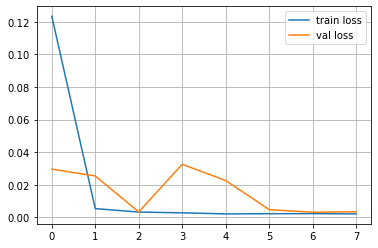

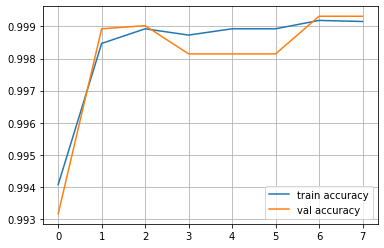

In [11]:
Y_pred = numpy.argmax(model.predict(X_test) , axis=1 )

print(classification_report(Y_test, Y_pred))
print_metrics(confusion_matrix(Y_test, Y_pred), Y_test)
print()

plot_loss(history)
plot_accuracy(history)

In [12]:
model.save('ResNet_bert128.h5')

## SMOTE

In [2]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=5)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, stratify=Y_train, test_size=0.25, random_state=10)

del X
del y

# oversample class 1
X_train, Y_train = oversample_smote(np.reshape(X_train, (-1, 128*768)), Y_train )
X_train = np.reshape( X_train, (-1, 128, 768) )
print("class counts oversampled data set:", (X_train.shape[0], Y_train.shape[0]))

print("train:")
print(Counter(Y_train))
print(X_train.shape)
print(Y_train.shape)
print("\nval:")
print(Counter(Y_val))
print(X_val.shape)
print(Y_val.shape)
print("\ntest:")
print(Counter(Y_test))
print(X_test.shape)
print(Y_test.shape)

Y_train, Y_val = to_categorical(Y_train), to_categorical(Y_val)

imbalanced_learn version  0.7.0
Counter output before SMOTE: Counter({0: 30438, 1: 274})
Counter output after SMOTE: Counter({0: 30438, 1: 30438})
class counts oversampled data set: (60876, 60876)
train:
Counter({0: 30438, 1: 30438})
(60876, 128, 768)
(60876,)

val:
Counter({0: 10146, 1: 92})
(10238, 128, 768)
(10238,)

test:
Counter({0: 10146, 1: 92})
(10238, 128, 768)
(10238,)


In [4]:
# https://keras.io/api/applications/resnet/#resnet50-function
model = applications.ResNet50(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=(128, 768, 1),
    pooling=None,
    classes=2
)

sgd = tf.keras.optimizers.SGD(learning_rate=0.1)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

history = model.fit(X_train, Y_train,
                    epochs=8,
                    verbose=True,
                    validation_data=(X_val, Y_val)
                   )

Epoch 1/8
1903/1903 [==============================] - 461s 242ms/step - loss: 0.1375 - accuracy: 0.9811 - val_loss: 0.0067 - val_accuracy: 0.9987
Epoch 2/8
1903/1903 [==============================] - 458s 240ms/step - loss: 0.0052 - accuracy: 0.9987 - val_loss: 0.0079 - val_accuracy: 0.9986
Epoch 3/8
1903/1903 [==============================] - 457s 240ms/step - loss: 0.0045 - accuracy: 0.9990 - val_loss: 0.0054 - val_accuracy: 0.9989
Epoch 4/8
1903/1903 [==============================] - 456s 239ms/step - loss: 0.0042 - accuracy: 0.9992 - val_loss: 0.0439 - val_accuracy: 0.9964
Epoch 5/8
1903/1903 [==============================] - 455s 239ms/step - loss: 0.0040 - accuracy: 0.9992 - val_loss: 0.0035 - val_accuracy: 0.9991
Epoch 6/8
1903/1903 [==============================] - 454s 239ms/step - loss: 0.0039 - accuracy: 0.9992 - val_loss: 0.0054 - val_accuracy: 0.9991
Epoch 7/8
1903/1903 [==============================] - 453s 238ms/step - loss: 0.0036 - accuracy: 0.9993 - val_loss: 0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10146
           1       0.86      0.98      0.91        92

    accuracy                           1.00     10238
   macro avg       0.93      0.99      0.96     10238
weighted avg       1.00      1.00      1.00     10238

Confusion matrix:
[[10131    15]
 [    2    90]]

Confusion matrix (Percentages):
[[9.8955e+01 1.4700e-01]
 [2.0000e-02 8.7900e-01]]

Metrics:
Sensitivity (TPR): 0.978261
Specifity (TNR):   0.998522

FPR: 0.001478
FNR: 0.021739

Balanced accuracy: 0.988391



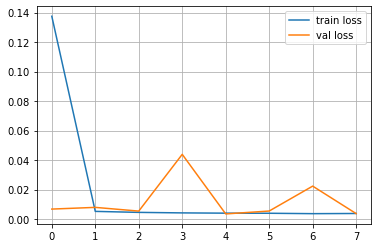

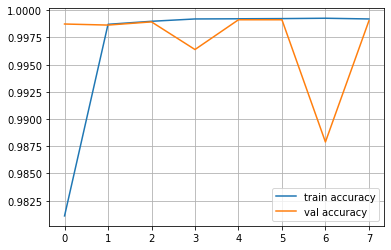

In [5]:
Y_pred = numpy.argmax(model.predict(X_test) , axis=1 )

print(classification_report(Y_test, Y_pred))
print_metrics(confusion_matrix(Y_test, Y_pred), Y_test)
print()

plot_loss(history)
plot_accuracy(history)

In [6]:
model.save('ResNet_bert128_SMOTE.h5')